In [26]:
# simple statistical analysis
# Author: Grace Guan 12/12/17
# subsection{The distribution of individual-group risk adjustment per member month in the 2014 benefit year}
# subsection{The distribution of individual-group risk adjustment per member month in the 2015 benefit year}
# subsection{The distribution of the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years}
# subsection{The distribution of total loss in the 2014 benefit year}
# subsection{The distribution of total loss in the 2015 benefit year}
# subsection{The correlation between total loss and the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years}
# subsection{The correlation between individual-group risk adjustment per member month in the 2014 benefit year and individual-group risk adjustment per member month in the 2015 benefit year}
# subsection{Basic statistics (such as mean, median, standard deviation, etc.) and outliers}


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   

# sample usage
#a = [1,4,6]
#b = [1,2,3]   
#print(pearsonr(a,b))

In [44]:
# import the datasets
df14 = pd.read_csv("2014_final_losscalcforpaper.csv", low_memory=False)
df15 = pd.read_csv("2015_final_losscalcforpaper.csv", low_memory=False)

# remove errors
df14 = df14.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)
df15 = df15.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)

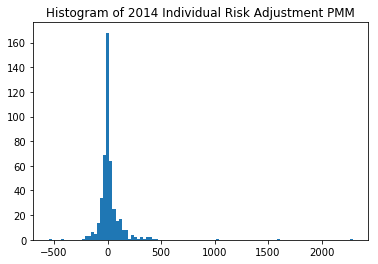

In [45]:
# The distribution of individual-group risk adjustment per member month in the 2014 benefit year
part1 = pd.to_numeric(df14["ARAIPMM"]).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2014 Individual Risk Adjustment PMM')

#plt.axis([-500, 500, 0, 100])
plt.show()

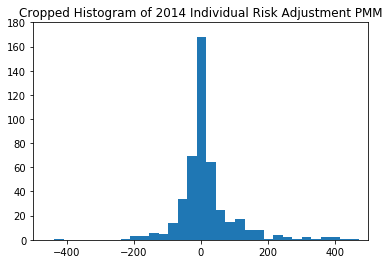

In [46]:
# The distribution of individual-group risk adjustment per member month in the 2014 benefit year
part1 = pd.to_numeric(df14["ARAIPMM"]).dropna(how='any')

plt.hist(part1,100)

plt.title('Cropped Histogram of 2014 Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 180])
plt.show()

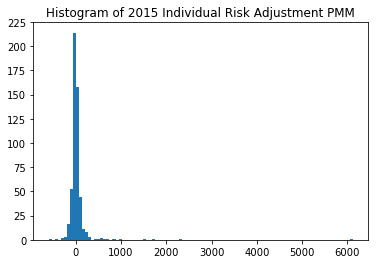

In [47]:
# The distribution of individual-group risk adjustment per member month in the 2015 benefit year
part1 = pd.to_numeric(df15["ARAIPMM"]).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2015 Individual Risk Adjustment PMM')

#plt.axis([-500, 500, 0, 100])
plt.show()

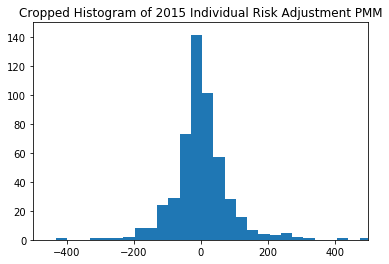

In [48]:
# The distribution of individual-group risk adjustment per member month in the 2015 benefit year
part1 = pd.to_numeric(df15["ARAIPMM"]).dropna(how='any')

plt.hist(part1,200)

plt.title('Cropped Histogram of 2015 Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 150])
plt.show()

In [49]:
combined = pd.merge(df14, df15, on='HIOS')

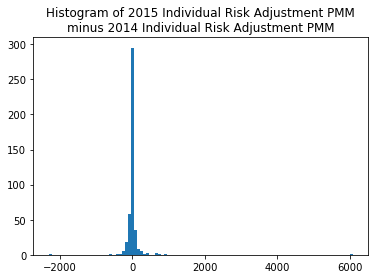

In [50]:
# The distribution of the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years
part1 = (pd.to_numeric(combined["ARAIPMM_y"]) - pd.to_numeric(combined["ARAIPMM_x"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2015 Individual Risk Adjustment PMM\nminus 2014 Individual Risk Adjustment PMM')

#plt.axis([-500, 500, 0, 150])
plt.show()

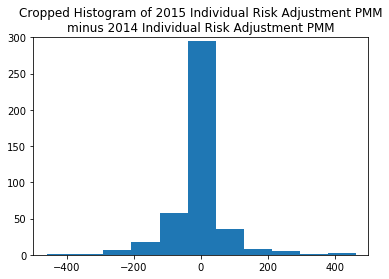

In [51]:
# The distribution of the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years
part1 = (pd.to_numeric(combined["ARAIPMM_y"]) - pd.to_numeric(combined["ARAIPMM_x"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Cropped Histogram of 2015 Individual Risk Adjustment PMM\nminus 2014 Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 300])
plt.show()

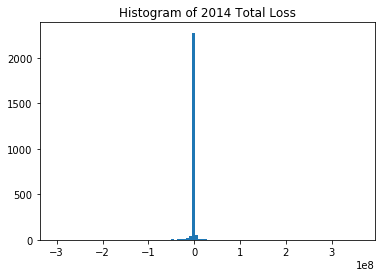

In [43]:
# The distribution of total loss in the 2014 benefit year
part1 = (pd.to_numeric(df14["TotalLoss"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2014 Total Loss PMM')

#plt.axis([-500, 500, 0, 300])
plt.show()

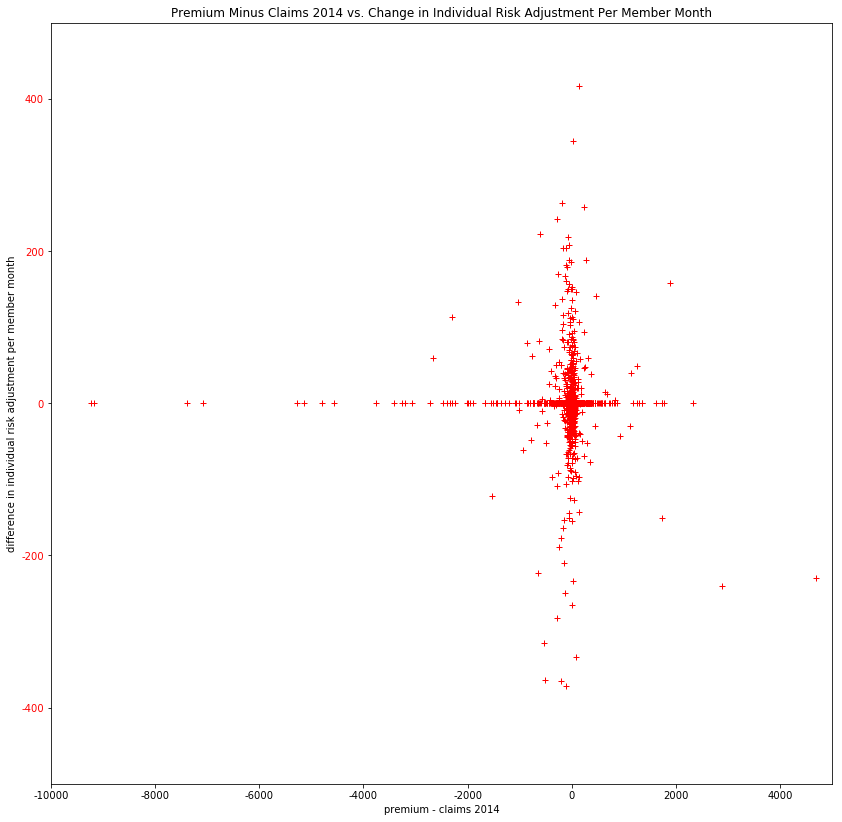

In [17]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(14, 14))
ax1.set_title('Premium Minus Claims 2014 vs. Change in Individual Risk Adjustment Per Member Month')

ax1.plot(df1["TotalProfitPMM"], 
         df1["DifferenceInIRAPMM"], '+', color='r')
ax1.set_xlabel('premium - claims 2014')
ax1.set_ylabel('difference in individual risk adjustment per member month')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')

ax1.set_xlim([-10000,5000])
ax1.set_ylim([-500,500])
plt.show()

In [25]:
correlation = df1[["TotalProfitPMM", "DifferenceInIRAPMM"]].dropna(how='any')

In [26]:


print(pearsonr(pd.to_numeric(correlation["TotalProfitPMM"]), pd.to_numeric(correlation["DifferenceInIRAPMM"])))

(0.99339926779878274, 0.073186395040328034)
(0.00062799661884443329, 0.98102390913094994)


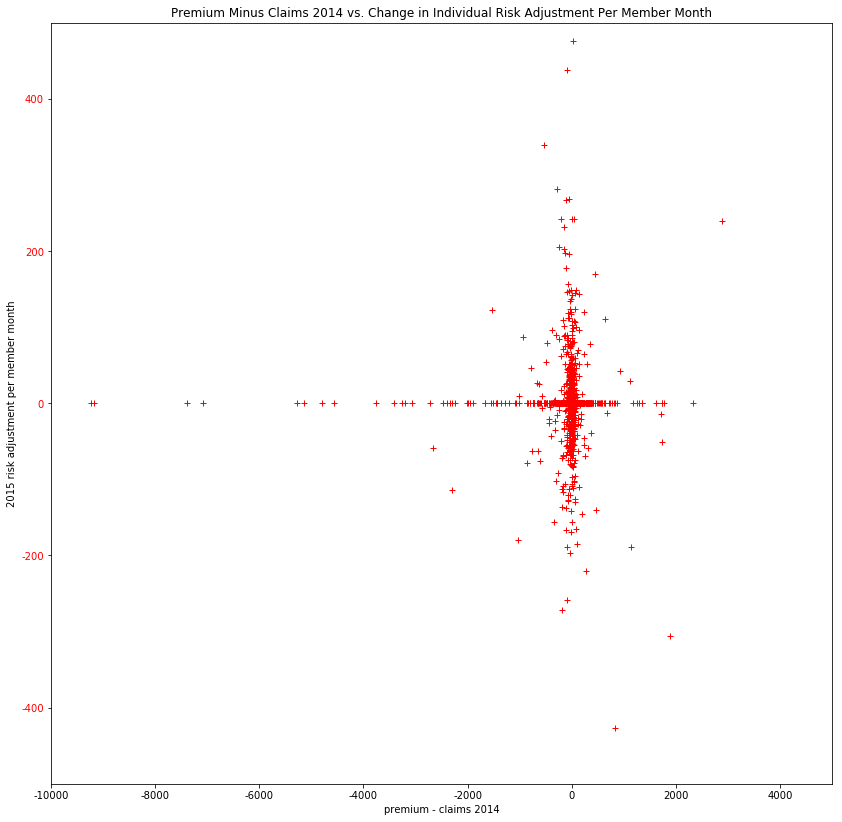

In [29]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(14, 14))
ax1.set_title('Premium Minus Claims 2014 vs. 2015 Risk Adjustment Per Member Month')

ax1.plot(df1["TotalProfitPMM"], 
         df1["2015RiskAdj"], '+', color='r')
ax1.set_xlabel('premium - claims 2014')
ax1.set_ylabel('2015 risk adjustment per member month')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')

ax1.set_xlim([-10000,5000])
ax1.set_ylim([-500,500])
plt.show()

In [31]:
# correlation
correlation2 = df1[["TotalProfitPMM", "2015RiskAdj"]].dropna(how='any')
print(pearsonr(pd.to_numeric(correlation2["TotalProfitPMM"]), pd.to_numeric(correlation2["2015RiskAdj"])))

(-0.010885283670447833, 0.68012680381560531)


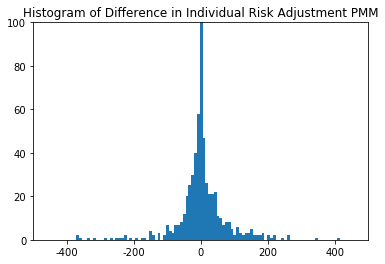

In [40]:

plt.hist(pd.to_numeric(correlation["DifferenceInIRAPMM"]), 1000)

plt.title('Histogram of Difference in Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 100])
plt.show()

In [41]:
df3 = pd.read_csv("corr.csv")
# remove errors
df3 = df3.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)
df3 = df3[['2014RiskAdjNo0','2015RiskAdjNo0']].dropna(how='any')
print(df3)

     2014RiskAdjNo0  2015RiskAdjNo0
0         28.651208     6120.333333
1       1582.359307     2323.088068
2        916.856739     1745.474775
3         49.643688     1559.612099
4        346.600962      710.627919
5          0.000000      682.642222
6        -36.701727      632.591667
7        409.464357      597.834876
8        319.024783      548.190000
9        436.551755      545.262058
10       243.076211      476.495006
11       372.054403      438.128814
12        23.787500      338.771395
13        -0.830776      280.956473
14       236.903308      268.036929
15      -103.879464      267.654423
16      -122.633188      242.657792
17       115.663372      242.284758
18       378.223350      242.008292
19         0.000000      239.745193
20        78.508982      231.654919
21       259.021296      204.900255
22        -6.083223      203.190782
23       -51.947644      196.872517
24        45.505462      195.648649
25        72.682929      178.411087
26       140.307273      170

In [42]:
print(pearsonr(pd.to_numeric(df3["2014RiskAdjNo0"]), pd.to_numeric(df3["2015RiskAdjNo0"])))

(0.31078832019584091, 7.5511609648400149e-14)


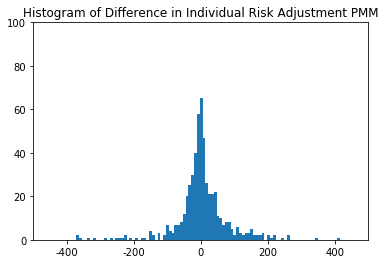

In [43]:

plt.hist(pd.to_numeric(df3["2014RiskAdjNo0"] - df3["2015RiskAdjNo0"]), 1000)

plt.title('Histogram of Difference in Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 100])
plt.show()